## Observations and Insights 

In [1]:
# Dependencies and Setup
# Added numpy to dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
# Combine the data into a single dataset
Full_stdy = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
Full_stdy.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_count = len(Full_stdy["Mouse ID"].value_counts())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Boolean Mask
mouse_dup =Full_stdy.loc[Full_stdy.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
mouse_dup.head(10)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup2 =Full_stdy.loc[Full_stdy["Mouse ID"] == "g989"]
mouse_dup2.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Delete rows based on a condition of the 'Mouse ID' column
cln_stdy1 = Full_stdy[Full_stdy['Mouse ID'] != 'g989']
#Changed column name from 'Tumor Volume (mm3)' to 'Tumor Volume mm3'
#I prefer to not work with parentheses in column names
cln_stdy =cln_stdy1.rename(columns={'Tumor Volume (mm3)':'Tumor Volume mm3'})
cln_stdy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(cln_stdy['Mouse ID'].value_counts())
mouse_count2

248

## Summary Statistics
The following cells are used to generate summary statistics (mean, median, variance, standard deviation
and SEM of the tumor volume for each Drug Regimen

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [9]:
#Mean of 'Tumor Volume mm3' grouped by 'Drug Regimen'
mean_tvol = cln_stdy.groupby(['Drug Regimen']).mean()['Tumor Volume mm3']
#Median of 'Tumor Volume mm3' grouped by 'Drug Regimen'
median_tvol = cln_stdy.groupby(['Drug Regimen']).median()['Tumor Volume mm3']
#Variance of 'Tumor Volume mm3' grouped by 'Drug Regimen'
variance_tvol = cln_stdy.groupby(['Drug Regimen']).var()['Tumor Volume mm3']
#Standard Deviation of 'Tumor Volume mm3' grouped by 'Drug Regimen'
standard_deviation_tvol = cln_stdy.groupby(['Drug Regimen']).std()['Tumor Volume mm3']
#SEM of 'Tumor Volume mm3' grouped by 'Drug Regimen'
SEM_tvol = cln_stdy.groupby(['Drug Regimen']).sem()['Tumor Volume mm3']

In [10]:
# Summary dataframe based on the above series
study_summary = pd.DataFrame ({'Mean Tumor Volume': mean_tvol,
                               'Median Tumor Volume': median_tvol,
                               'Tumor Variance': variance_tvol,
                               'Tumor STD': standard_deviation_tvol,
                               'Tumor SEM': SEM_tvol
                                })
study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [12]:
#Creating a user friendly Dataframe and lists for the bar charts.
#The code is this cell will create a DataFrame with an index starting at zero and columns for both 'TimePoint' and
#'Drug Regimen'. I know this isn't the most efficent way to get the desired result but I want to get experience
# with different ways to clean and organize DataFrames.

#Sum of Timepoints grouped by Drug Regimen
timepoints_sum = cln_stdy.groupby('Drug Regimen').sum()['Timepoint']
#Create DataFrame
tps_sum = pd.DataFrame(timepoints_sum)
#Create a column with the values of the current index
tps_sum[tps_sum.index.name] = tps_sum.index
#Create a variable,'dexcount' starting with zero and increasing by 1 per row, to use as an index
dexcount = pd.Index(range(0,len(tps_sum)))
#set index to 'dexcount'
tps_sum = tps_sum.set_index(dexcount)
#Create list based on 'Timepoint' column
tps_sum_list = tps_sum['Timepoint'].tolist()
#Create list based on 'Drug Regimen' column
tps_sum_labels = tps_sum['Drug Regimen'].tolist()
#tps_sum

<AxesSubplot:title={'center':'Timepoints by Regimen'}, xlabel='Drug Regimen', ylabel='Count of Timepoints by Regimen'>

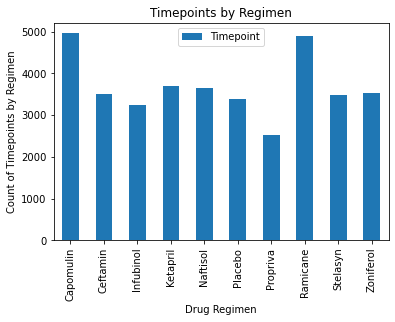

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tps_plot = tps_sum
tps_plot.plot(kind='bar',x="Drug Regimen", y="Timepoint",
              title="Timepoints by Regimen", ylabel="Count of Timepoints by Regimen")

Text(0, 0.5, 'Count of Time Points per Regimen')

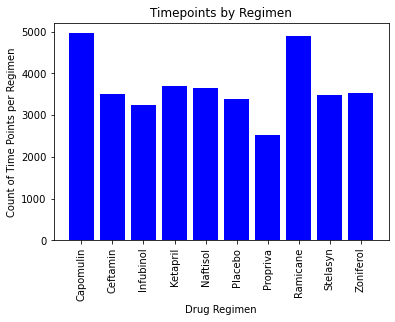

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
sty_Regimens = tps_sum_labels
sty_tpoints = tps_sum_list
x_axis = np.arange(len(sty_tpoints))
plt.bar(x_axis, sty_tpoints, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,sty_Regimens,rotation="vertical")
plt.title("Timepoints by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Time Points per Regimen")

In [15]:
#Create user friendly dateframe and lists for Pie Charts.
#The code is this cell will create a DataFrame with an index starting at zero and columns for both 'Count' and
#'Sex'.

#Count of 'Mouse ID' grouped by 'Sex'
mouse_s_count = cln_stdy.groupby(['Sex']).count()['Mouse ID']
#Create DataFrame
mouse_sex = pd.DataFrame(mouse_s_count)
#Create a column with the values of the current index
mouse_sex[mouse_sex.index.name] = mouse_sex.index
#Create a variable,'dexcount' starting with zero and increasing by 1 per row, to use as an index
dexcount = pd.Index(range(0,len(mouse_sex)))
#Set index to 'dexcount'
mouse_sex = mouse_sex.set_index(dexcount)
#Rename Column
mouse_sex = mouse_sex.rename(columns={"Mouse ID":"Count"})
#Create list based on 'Count' column
ms_count_count = mouse_sex['Count'].tolist()
#Create list based on 'Sex' column
ms_count_sex = mouse_sex['Sex'].tolist()
#mouse_sex

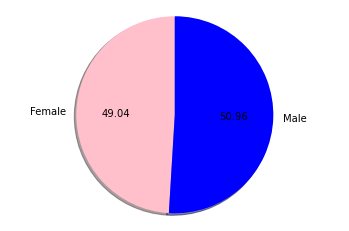

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ms_label = ms_count_sex
ms_counts = ms_count_count
ms_colors = ["Pink","Blue"]
plt.pie(ms_counts,labels=ms_label,colors=ms_colors, shadow=True, startangle=90,autopct="%.2f")
plt.axis("equal")
plt.Title="Distribution of Sex"


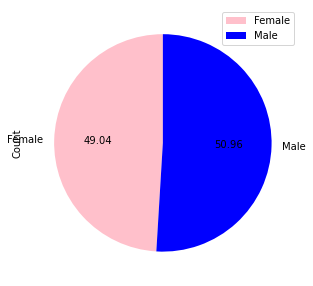

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = mouse_sex
pie_data.plot.pie(y="Count",figsize=(5,5),labels=["Female","Male"],colors=["pink","blue"],startangle=90,
                 autopct="%.2f");


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
newclean = DataFrame=(cln_stdy)
new_clean = newclean[(newclean['Drug Regimen']== 'Capomulin') 
                     | (newclean['Drug Regimen']== 'Ramicane')
                     | (newclean['Drug Regimen']== 'Infubinol')
                     | (newclean['Drug Regimen']== 'Ceftamin')
                    ]
new_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [19]:
max_tp_mouse = new_clean.groupby(['Mouse ID']).max()['Timepoint']
max_tp_mouse

max_tp_frame = pd.DataFrame(max_tp_mouse)
max_tp_frame

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_study = pd.merge(max_tp_frame, new_clean , on=["Timepoint", "Mouse ID"])
max_tp_study

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume mm3,Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
max_tp_treatments = max_tp_study['Drug Regimen'].unique()
max_tp_treatments = max_tp_treatments.tolist()
max_tp_treatments

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [21]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
#tumor_data

#loop
for name in max_tp_treatments:
    tumor_values = max_tp_study.loc[max_tp_study['Drug Regimen']==name,'Tumor Volume mm3']
    tumor_data.append(tumor_values)
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq =quartiles[.25]
    upperq =quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_outliers = tumor_values.loc[(tumor_values<lower_bound) | (tumor_values>upper_bound)]
    print(f"{name} outliers are: {tumor_outliers}")

Infubinol outliers are: 15    36.321346
Name: Tumor Volume mm3, dtype: float64
Ceftamin outliers are: Series([], Name: Tumor Volume mm3, dtype: float64)
Ramicane outliers are: Series([], Name: Tumor Volume mm3, dtype: float64)
Capomulin outliers are: Series([], Name: Tumor Volume mm3, dtype: float64)


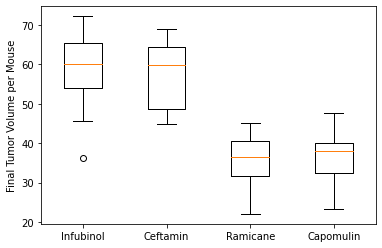

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, axl = plt.subplots()
axl.set_ylabel('Final Tumor Volume per Mouse')
axl.boxplot(tumor_data, labels=max_tp_treatments)
#xlabels = max_tp_treatments
plt.show()

## Line and Scatter Plots

In [23]:
#Create a Capomulin only data set
Capomulin_Regimen= cln_stdy[cln_stdy['Drug Regimen']== 'Capomulin']
Capomulin_Regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume mm3,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


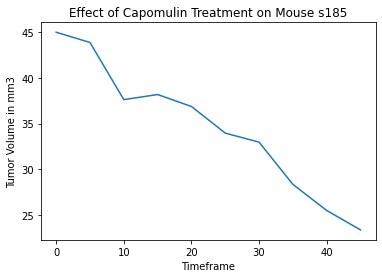

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_Mouse=Capomulin_Regimen[Capomulin_Regimen['Mouse ID']=='s185']
plt.plot(Capomulin_Mouse['Timepoint'],Capomulin_Mouse['Tumor Volume mm3'])
plt.title('Effect of Capomulin Treatment on Mouse s185')
plt.xlabel('Timeframe')
plt.ylabel('Tumor Volume in mm3')
plt.show()

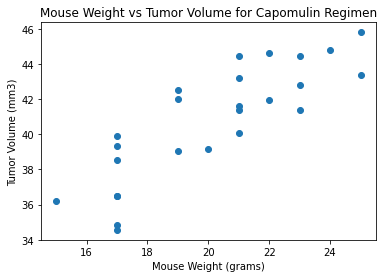

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Regimen_avgt = Capomulin_Regimen.groupby(['Mouse ID']).mean()
Capomulin_Regimen_avgt
#median_tvol = cln_stdy.groupby(['Drug Regimen']).median()['Tumor Volume mm3']
plt.scatter(Capomulin_Regimen_avgt['Weight (g)'] ,Capomulin_Regimen_avgt['Tumor Volume mm3'])
plt.title('Mouse Weight vs Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

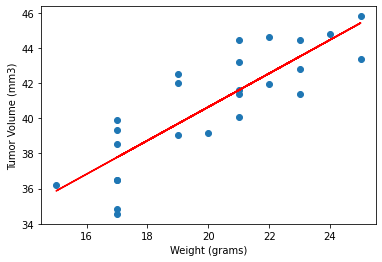

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_Regimen_avgt['Weight (g)']
y_values = Capomulin_Regimen_avgt['Tumor Volume mm3']

#
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values ,y_values)
#
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.xlabel('Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

